In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)

In [3]:
train.dropna(inplace=True)

train_X = train.drop(['Is.Back', 'Customer.ID'], axis=1)
test_X = test.drop(['Is.Back', 'Customer.ID'], axis=1)
train_Y = train[['Is.Back']]
test_Y = test[['Is.Back']]

In [4]:
train_X['Date'] = pd.to_datetime(train_X['Date'])
train_X['year'] = train_X['Date'].dt.year
train_X['month'] = train_X['Date'].dt.month
train_X['day'] = train_X['Date'].dt.day
train_X = train_X.drop('Date', axis=1)

test_X['Date'] = pd.to_datetime(test_X['Date'])
test_X['year'] = test_X['Date'].dt.year
test_X['month'] = test_X['Date'].dt.month
test_X['day'] = test_X['Date'].dt.day
test_X = test_X.drop('Date', axis=1)

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_X = pd.DataFrame(enc.fit_transform(train_X))
test_X = pd.DataFrame(enc.transform(test_X))

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
dt = RandomForestClassifier()

In [7]:
dt.fit(train_X, train_Y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [8]:
train_error = (dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y)
test_error = (dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y)

In [9]:
[train_error, test_error]

[Is.Back    0.987711
 dtype: float64, Is.Back    0.705543
 dtype: float64]

<h1> Hyper Parameters Tuning </h1>

In [20]:
train_errors = []
cnt = 0
test_errors = []
n_estimators = range(20, 100, 20)
for n_estimator in n_estimators:
    dt = RandomForestClassifier(max_depth=100, n_estimators=n_estimator)
    dt.fit(train_X, train_Y)
    train_error = ((dt.predict(train_X).reshape(-1,1) == train_Y).sum() / len(train_Y))['Is.Back']
    test_error = ((dt.predict(test_X).reshape(-1,1) == test_Y).sum() / len(test_Y))['Is.Back']
    train_errors.append(train_error)
    test_errors.append(test_error)
    cnt = cnt + 1
    print('\r {} %'.format(int((cnt / len(n_estimators)) * 100)), end='')
    

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 25 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 50 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 75 %

/home/eta/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


 100 %

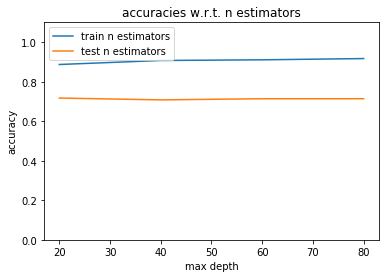

In [25]:
plt.title('accuracies w.r.t. n estimators')
plt.xlabel('max depth')
plt.ylabel('accuracy')
plt.plot(n_estimators, train_errors, label='train n estimators')
plt.plot(n_estimators, test_errors, label='test n estimators')
plt.ylim(0,1.1)
plt.legend()

In [26]:
[min(train_errors), min(test_errors)]

[0.8868248070877394, 0.707852193995381]